In [1]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *

%matplotlib inline

In [2]:
def evolution(scheme, r0s, v0s, T, h, e, G, masses):
    m1 = masses[0]
    m2 = masses[1]
    mu = G * (m1 + m2) 
    
    # reposition centre of mass to origin with no momentum 
    rcom, vcom = CentreOfMass(r0s, v0s, masses)
    r0sprime = r0s - rcom
    v0sprime = v0s - vcom

    traj = run_scheme(scheme, 0, T, h, r0sprime, v0sprime, G, masses)
    
    a = SemiMajorAxis(mu, r0s, v0s)
    
    t_traj = np.array(traj[0]) 
    rs_traj = traj[1]

    kepler_traj = KeplerOrbit(a, e, mu, t_traj)
    
    rs_traj_central = Centralise(rs_traj, 0) 

    errs = kepler_traj - rs_traj_central[:,1,:]
    errs = np.linalg.norm(errs, axis = 1)

    return errs, traj

In [3]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.0

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

#### h = 0.01, T = 50

In [4]:
h = 0.01
T = 50
trajectories = []
errs = []

In [5]:
Euler_errs, Euler_traj = evolution(EulerStep, r0s, v0s, T, h, e, G, masses)
trajectories.append(Euler_traj)
errs.append(Euler_errs)

In [6]:
EulerCromer_errs, EulerCromer_traj = evolution(EulerCromerStep, r0s, v0s, T, h, e, G, masses)
trajectories.append(EulerCromer_traj)
errs.append(EulerCromer_errs)

In [7]:
Leapfrog_errs, Leapfrog_traj = evolution(LeapfrogStep, r0s, v0s, T, h, e, G, masses)
trajectories.append(Leapfrog_traj)
errs.append(Leapfrog_errs)

In [8]:
RK4_errs, RK4_traj = evolution(RK4Step, r0s, v0s, T, h, e, G, masses)
trajectories.append(RK4_traj)
errs.append(RK4_errs)

In [9]:
ForestRuth_errs, ForestRuth_traj = evolution(PEFRLStep, r0s, v0s, T, h, e, G, masses)
trajectories.append(ForestRuth_traj)
errs.append(ForestRuth_errs)

In [10]:
Scipy_traj = run_scipy(0, T, h, r0s, v0s, G, masses)
    
a = SemiMajorAxis(mu, r0s, v0s)
    
t_traj = np.array(Scipy_traj[0]) 
rs_traj = Scipy_traj[1]

kepler_traj = KeplerOrbit(a, e, mu, t_traj)
    
rs_traj_central = Centralise(rs_traj, 0) 

Scipy_error = kepler_traj - rs_traj_central[:,1,:]
Scipy_error = np.linalg.norm(Scipy_error, axis = 1)
trajectories.append(Scipy_traj)
errs.append(Scipy_error)

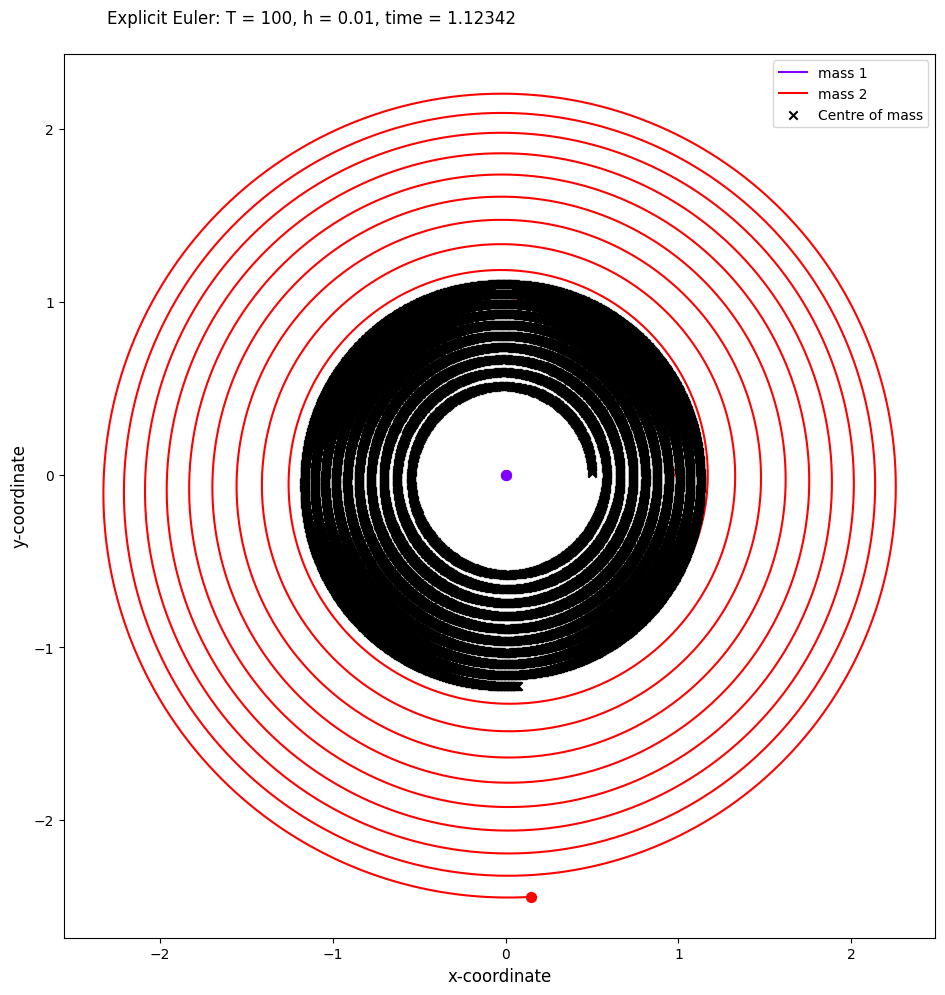

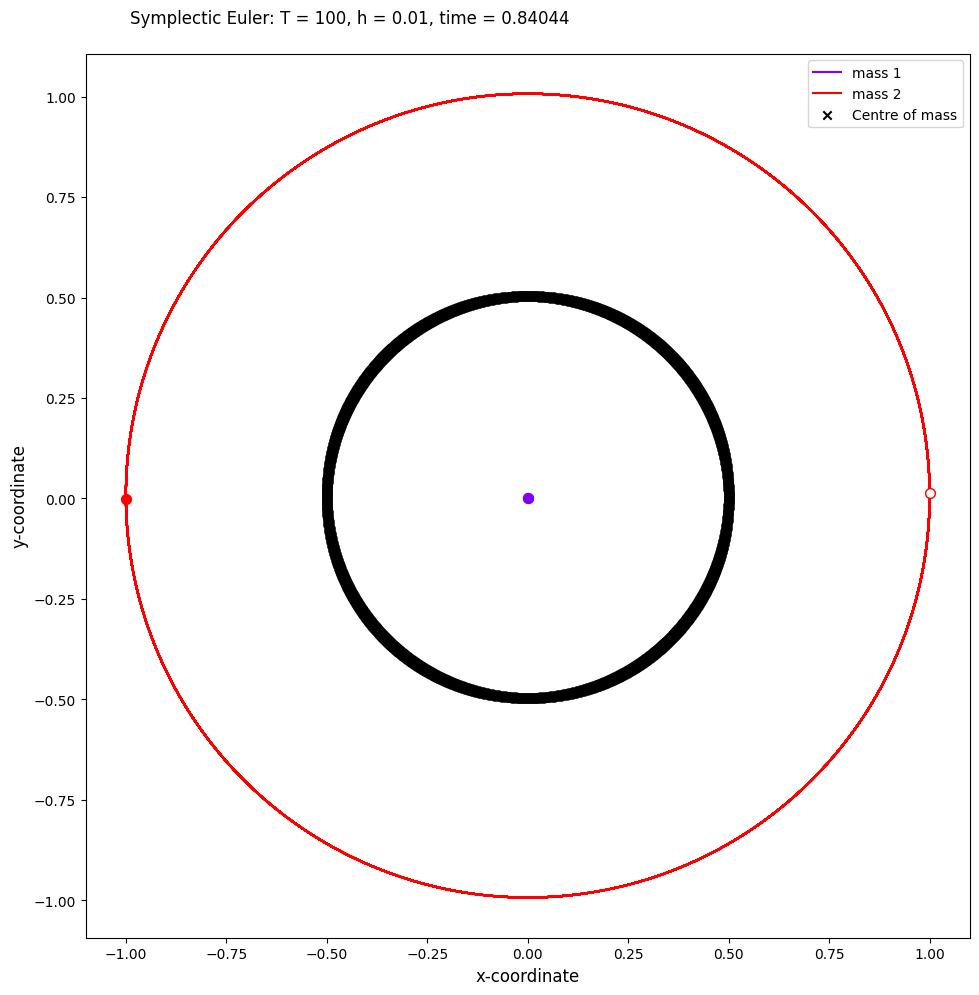

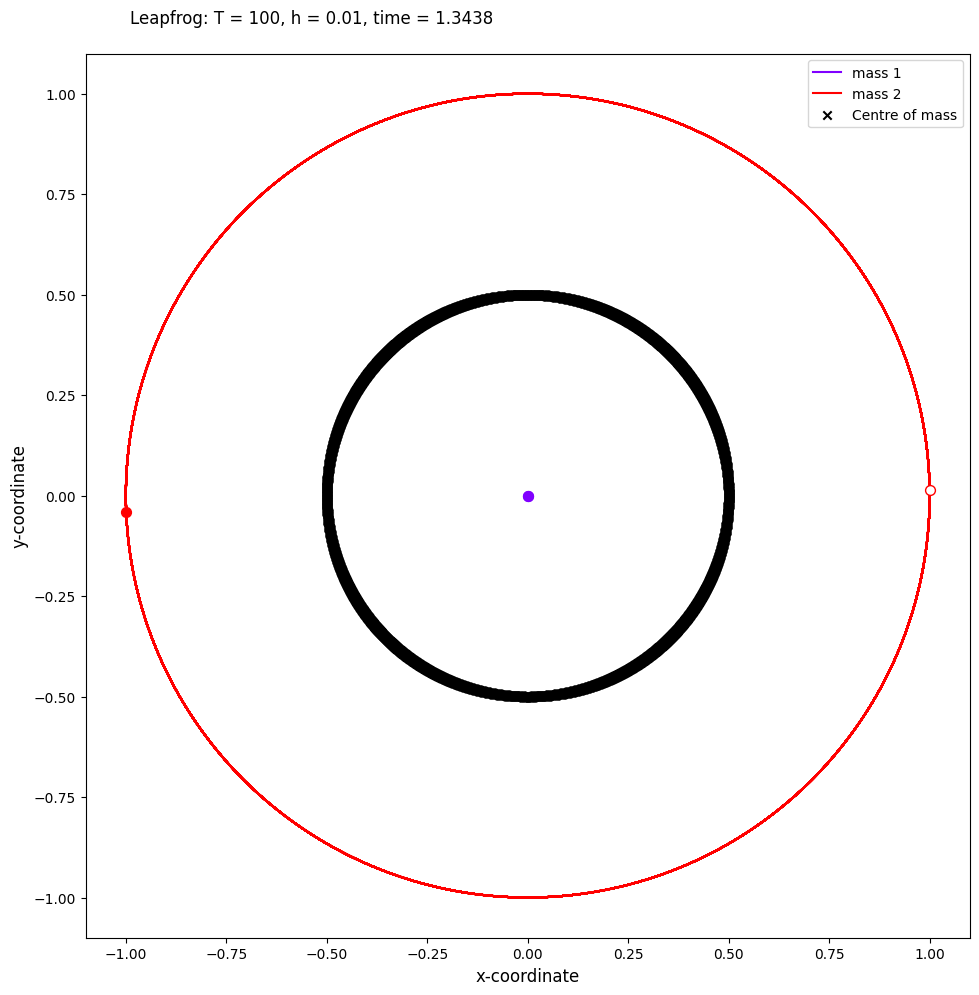

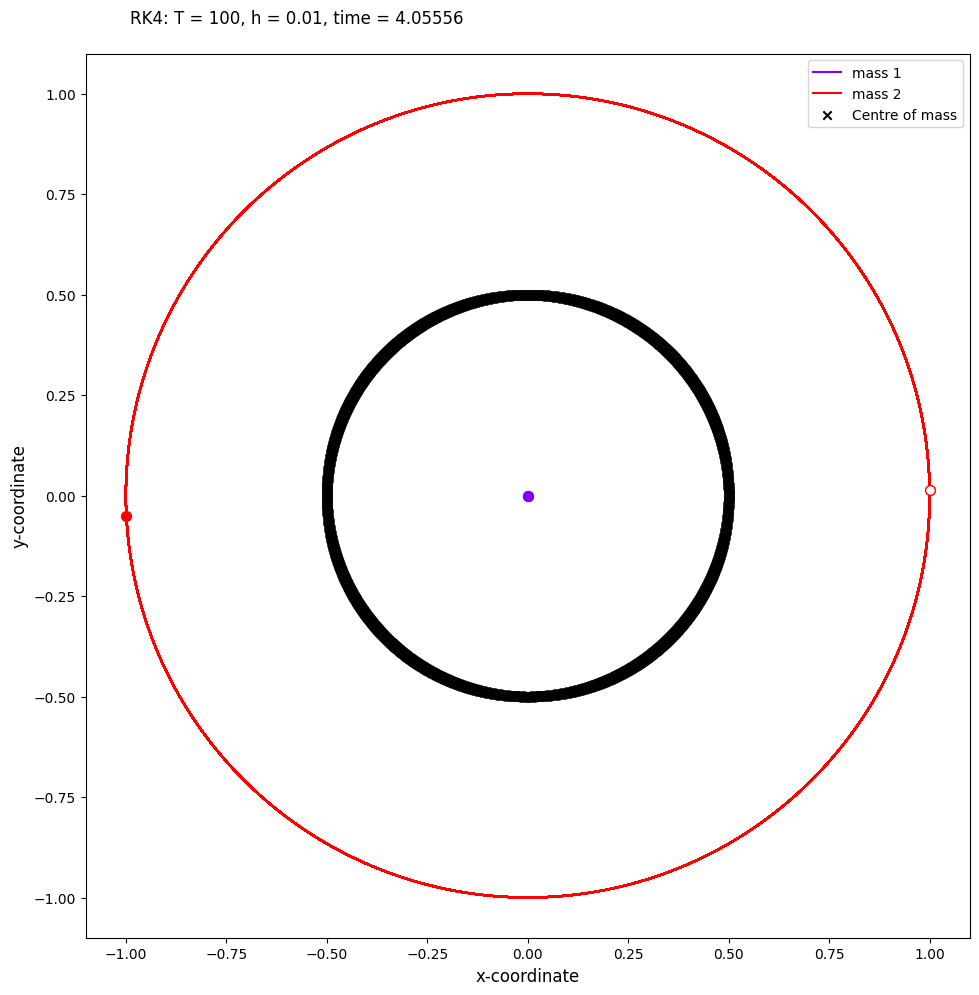

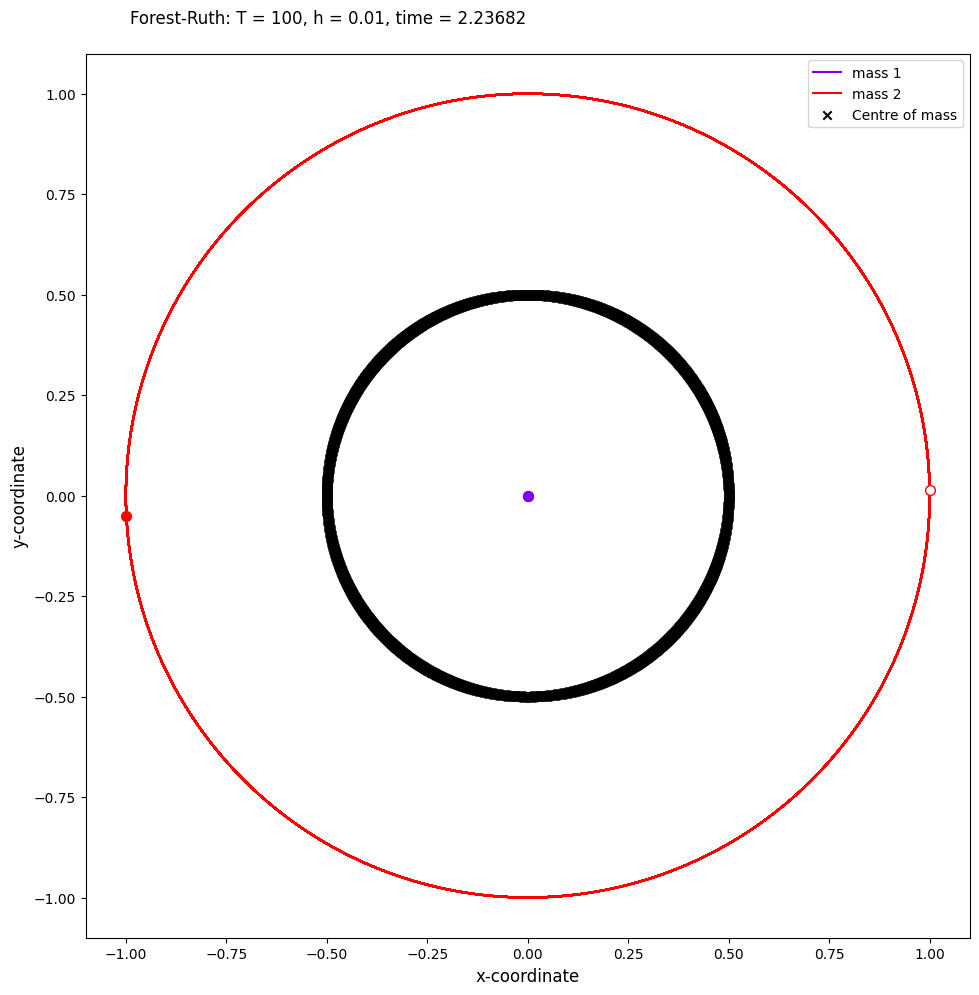

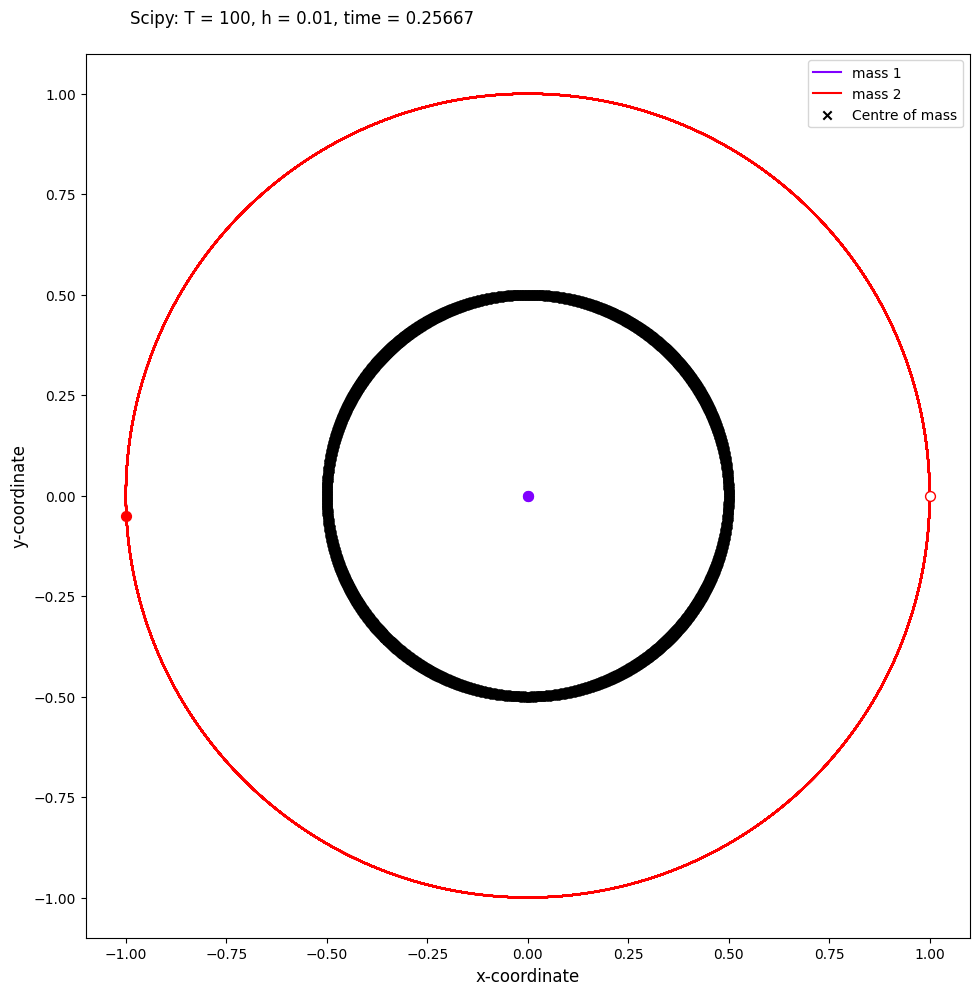

In [11]:
PlotOrbits(Euler_traj, 'Explicit Euler', T, h, masses)
plt.savefig('Plots/Trajectories/Explicit Euler Traj.pdf', format = 'pdf')

PlotOrbits(EulerCromer_traj, 'Symplectic Euler', T, h, masses)
plt.savefig('Plots/Trajectories/Symplectic Euler Traj.pdf', format = 'pdf')

PlotOrbits(Leapfrog_traj, 'Leapfrog', T, h, masses)
plt.savefig('Plots/Trajectories/Leapfrog Euler Traj.pdf', format = 'pdf')

PlotOrbits(RK4_traj, 'RK4', T, h, masses)
plt.savefig('Plots/Trajectories/RK4 Euler Traj.pdf', format = 'pdf')

PlotOrbits(ForestRuth_traj, 'Forest-Ruth', T, h, masses)
plt.savefig('Plots/Trajectories/Forest-Ruth Traj.pdf', format = 'pdf')

PlotOrbits(Scipy_traj, 'Scipy', T, h, masses)
plt.savefig('Plots/Trajectories/Scipy Traj.pdf', format = 'pdf')

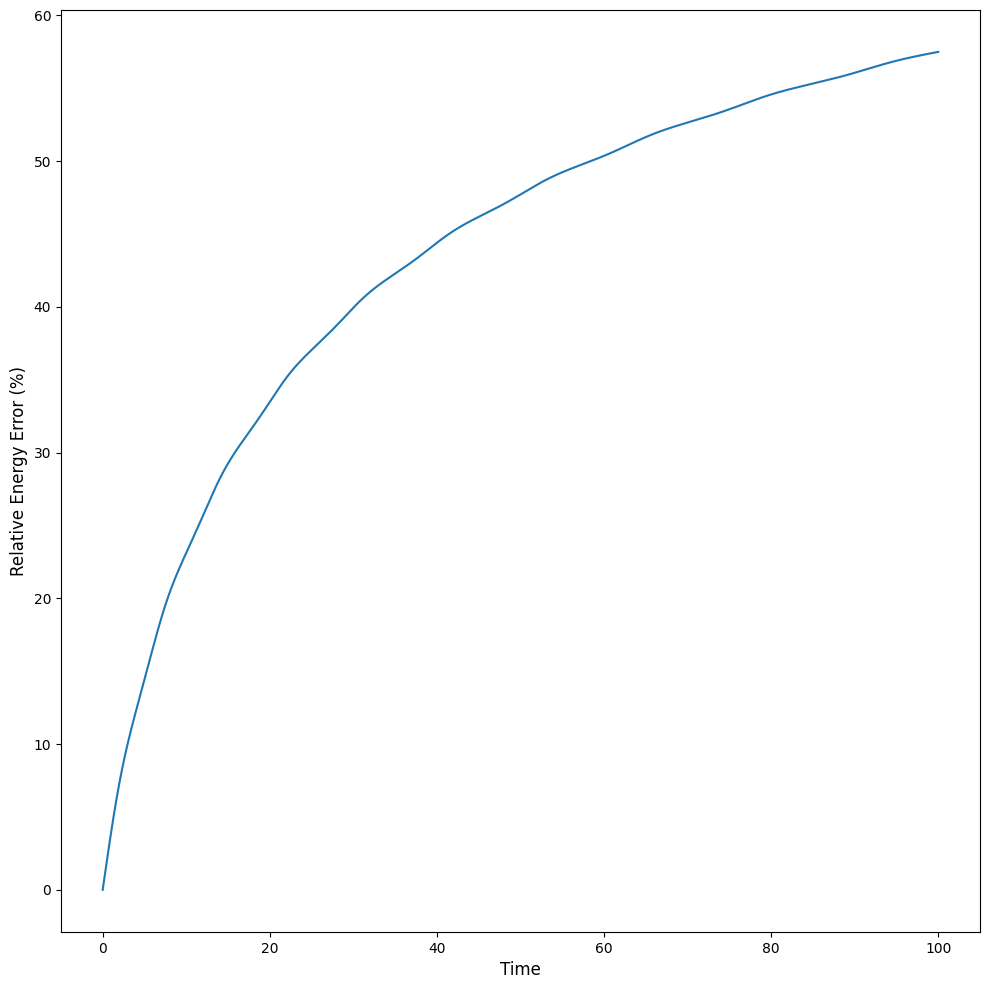

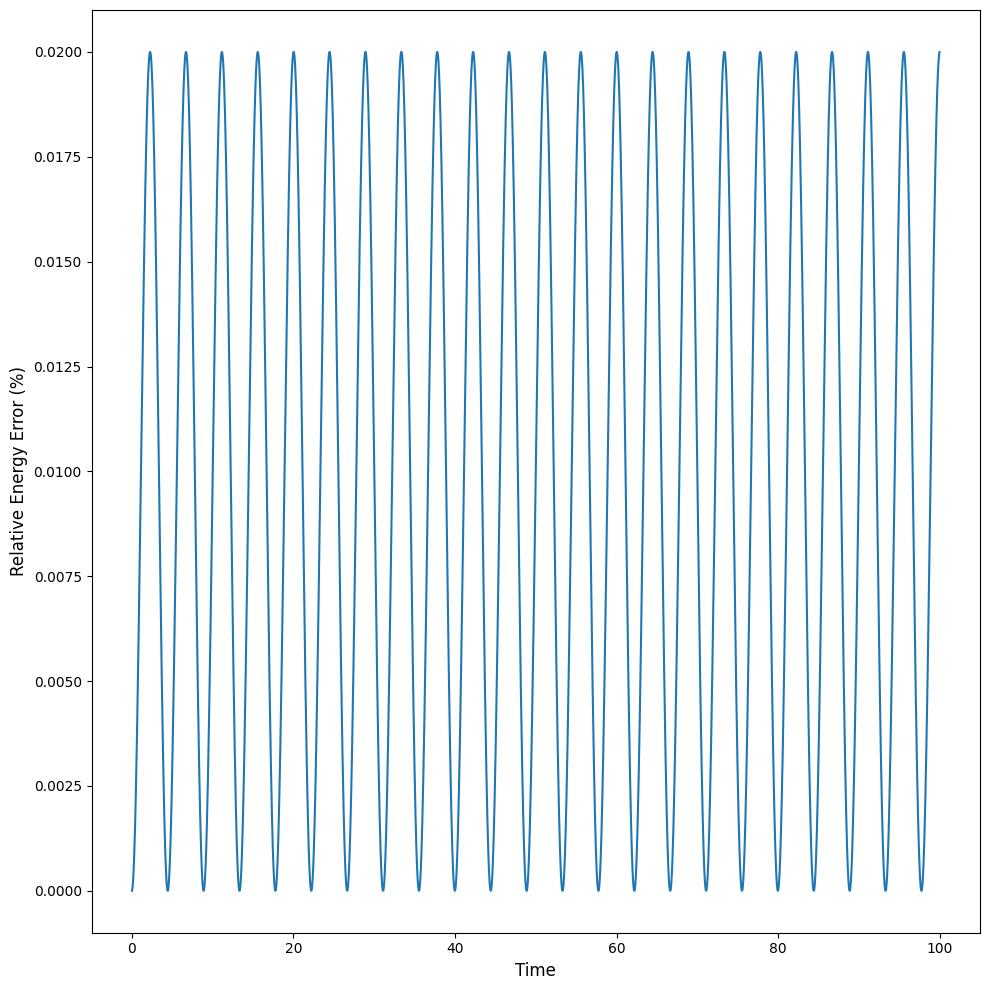

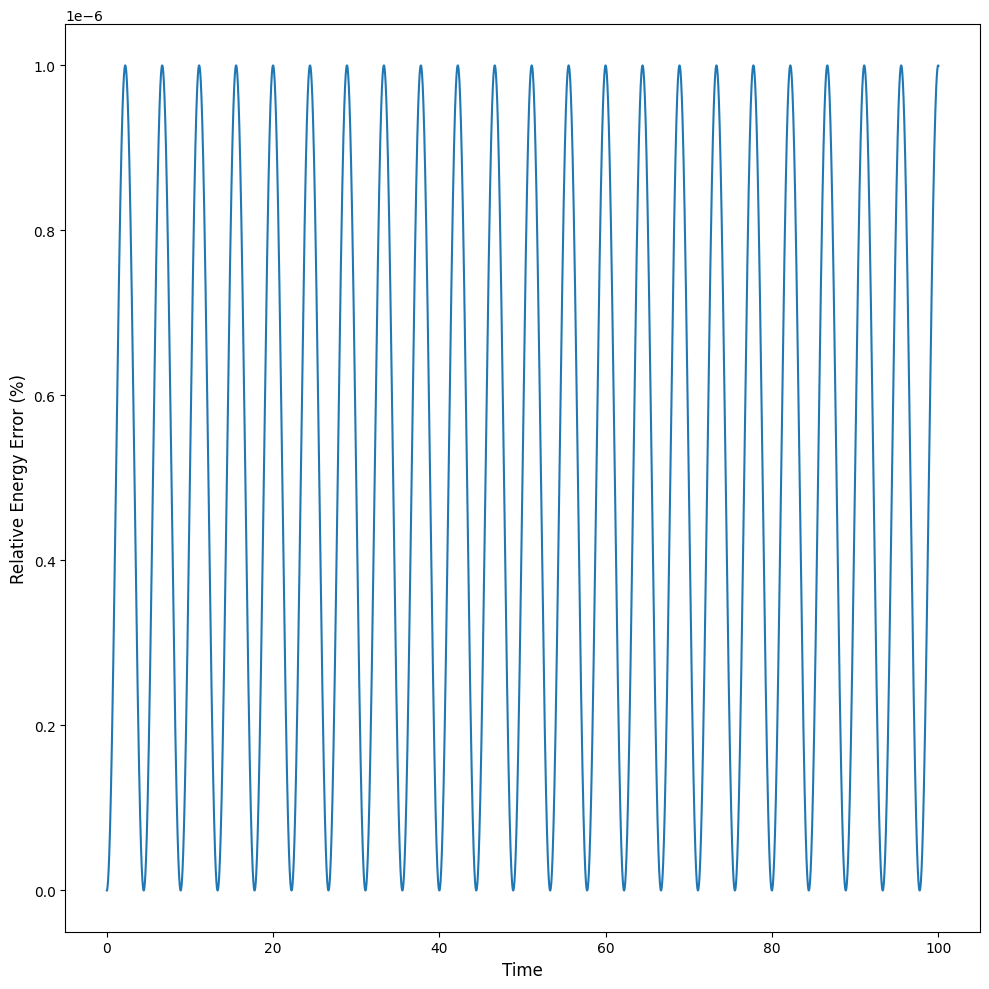

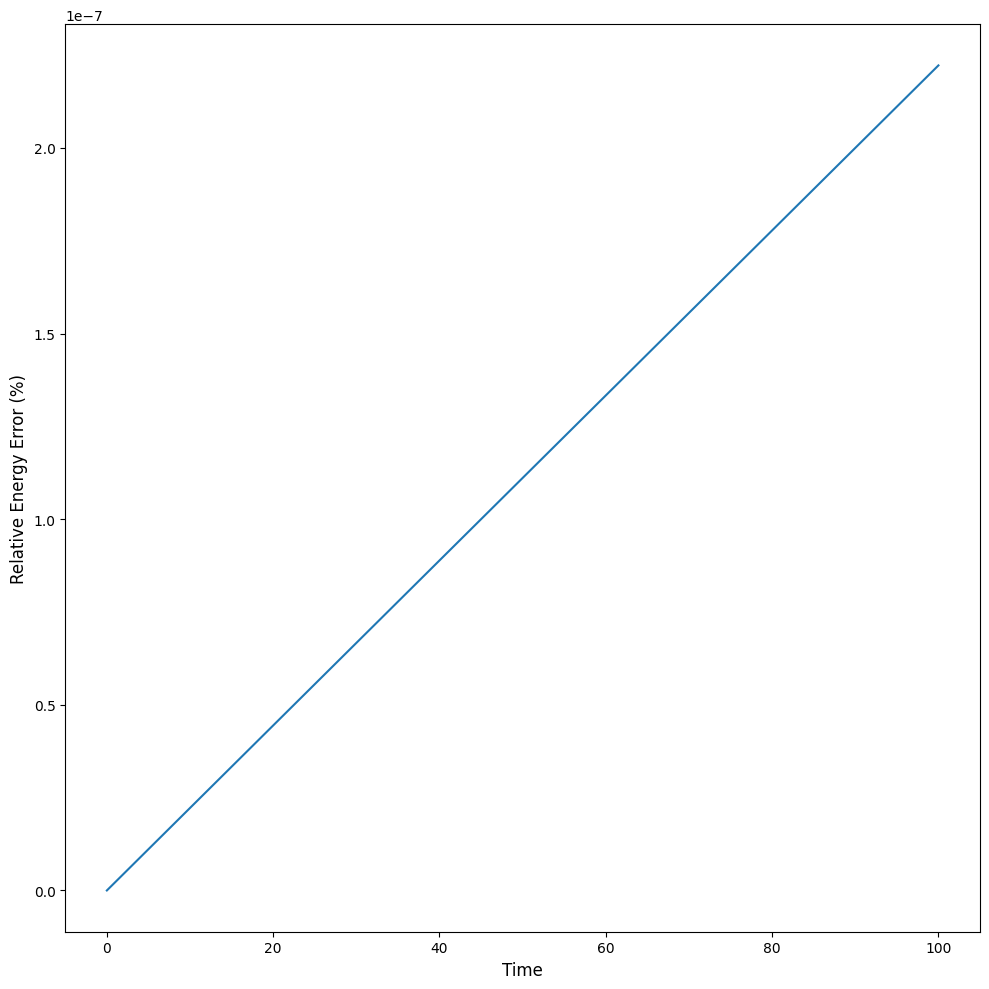

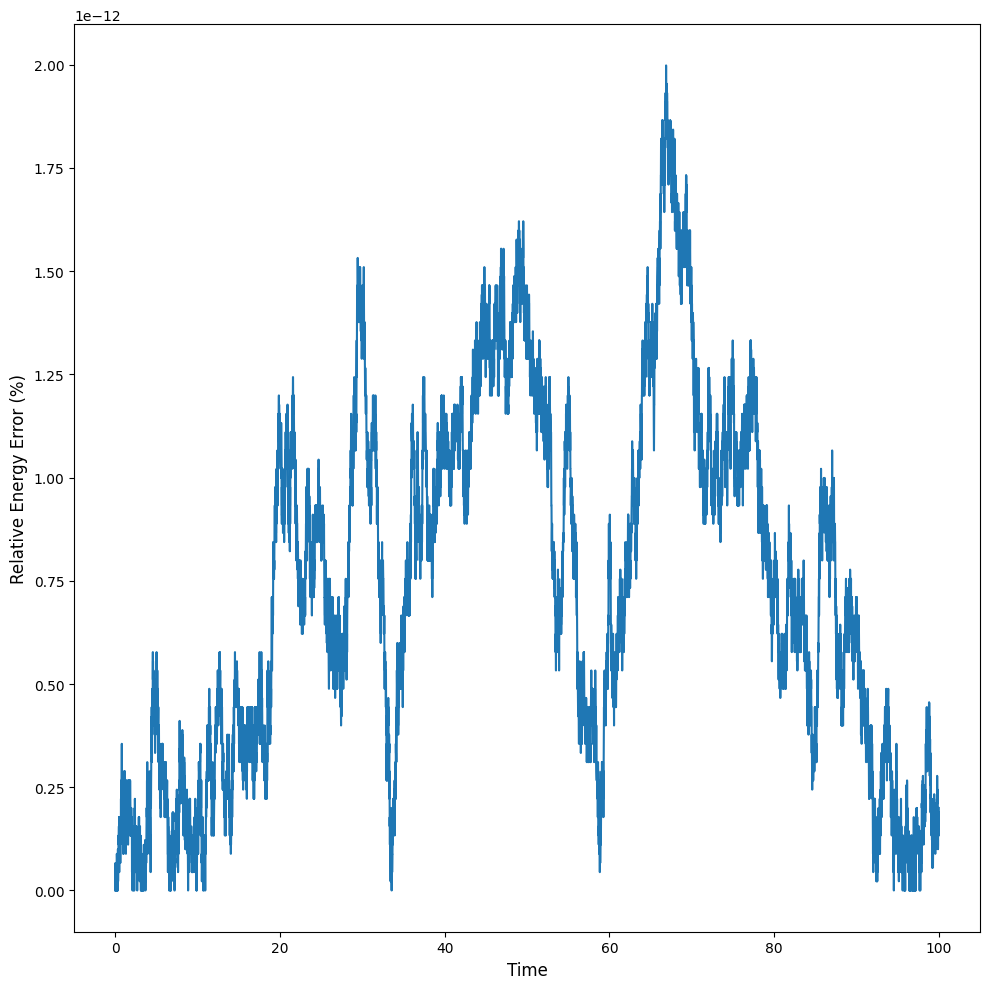

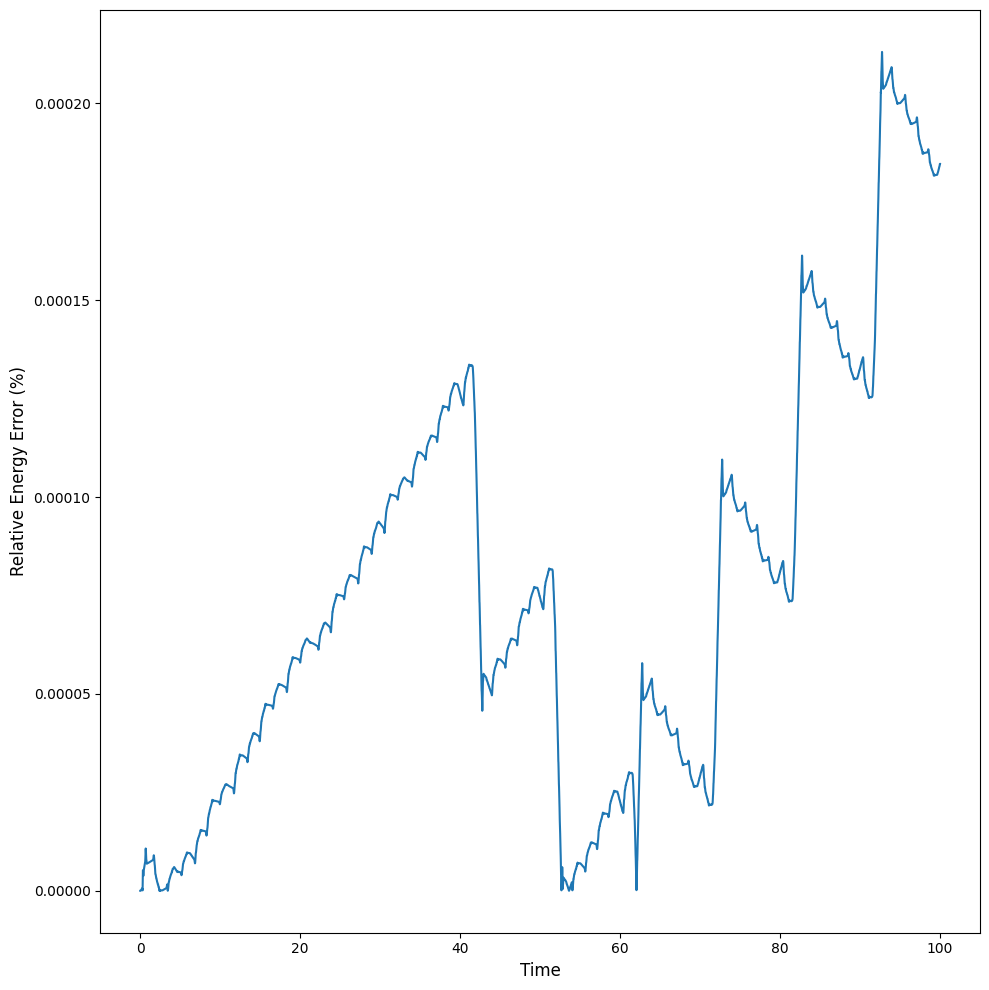

In [12]:
PlotEnergy(Euler_traj, 'Explicit Euler', T, h)
plt.savefig('Plots/Energy/Explicit Euler Energy.pdf', format = 'pdf')

PlotEnergy(EulerCromer_traj, 'Symplectic Euler', T, h)
plt.savefig('Plots/Energy/Symplectic Euler Energy.pdf', format = 'pdf')

PlotEnergy(Leapfrog_traj, 'Leapfrog', T, h)
plt.savefig('Plots/Energy/Leapfrog Euler Energy.pdf', format = 'pdf')

PlotEnergy(RK4_traj, 'RK4', T, h)
plt.savefig('Plots/Energy/RK4 Euler Energy.pdf', format = 'pdf')

PlotEnergy(ForestRuth_traj, 'Forest-Ruth', T, h)
plt.savefig('Plots/Energy/Forest-Ruth Energy.pdf', format = 'pdf')

PlotEnergy(Scipy_traj, 'Scipy', T, h)
plt.savefig('Plots/Energy/Scipy Energy.pdf', format = 'pdf')

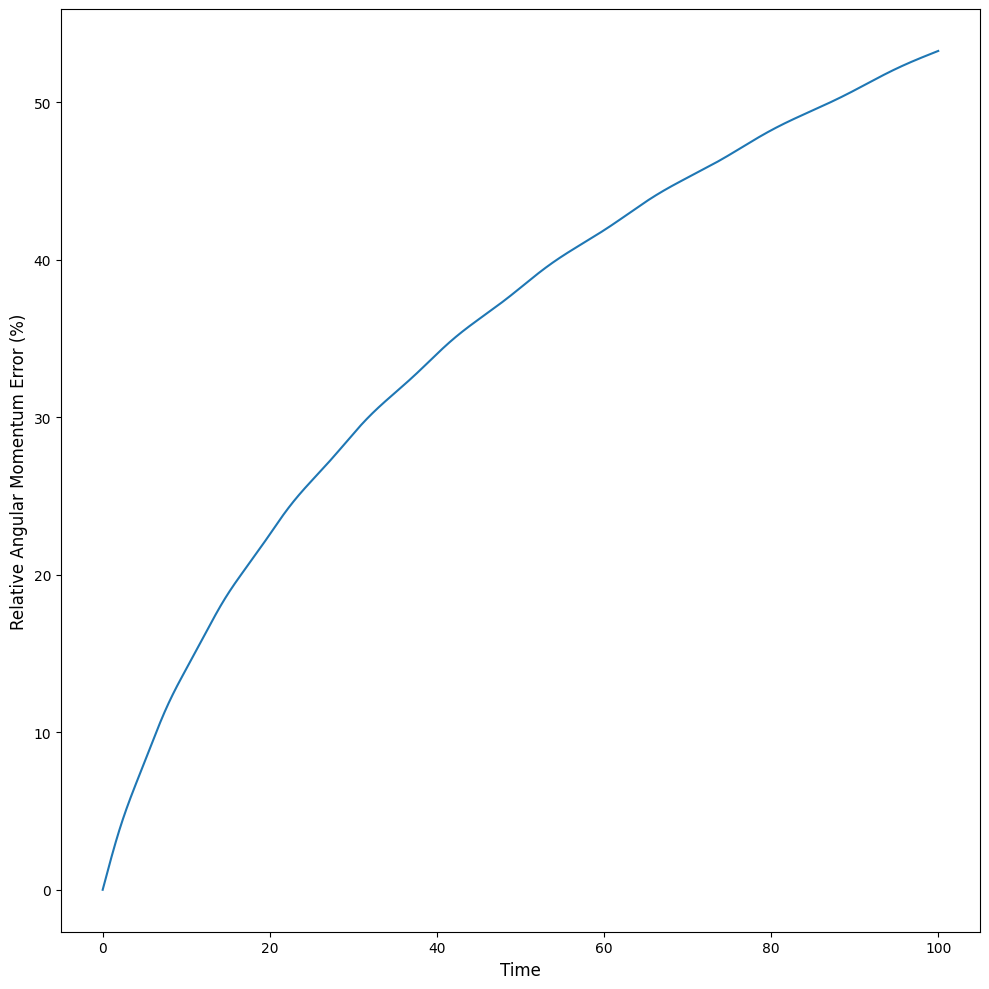

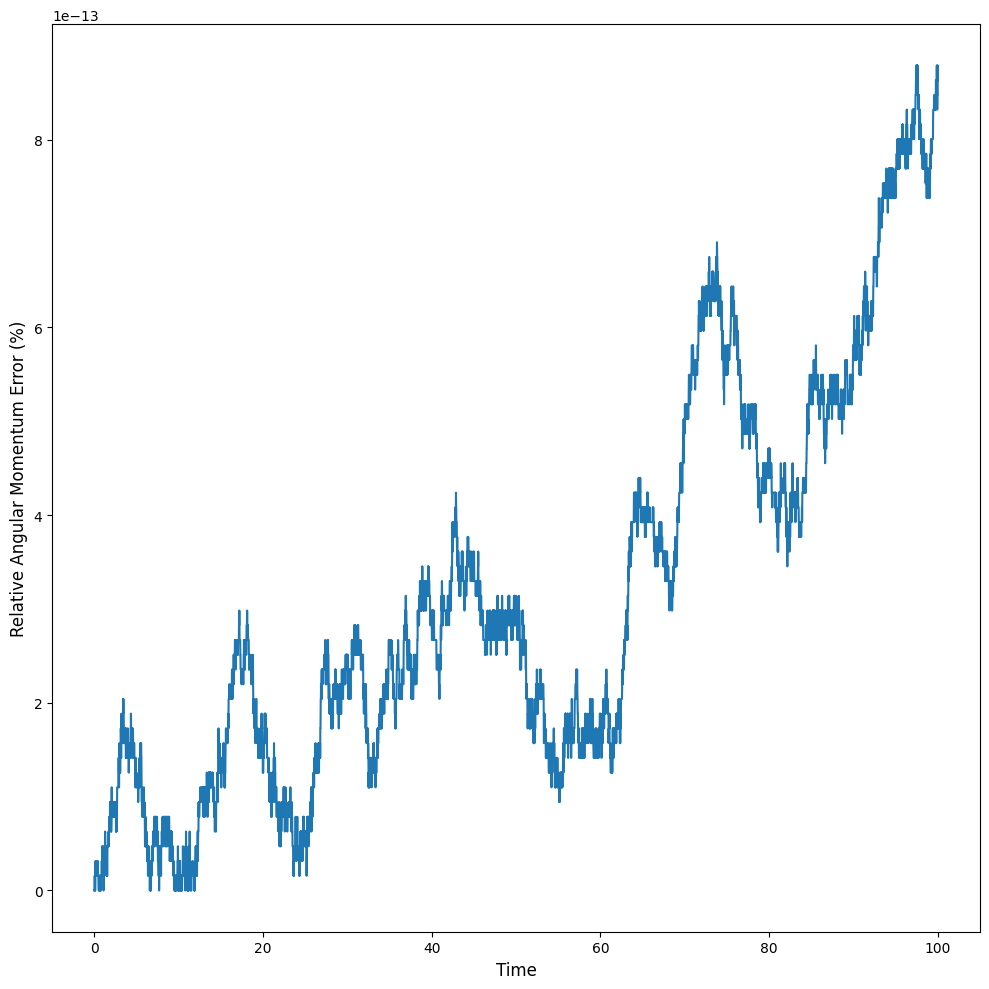

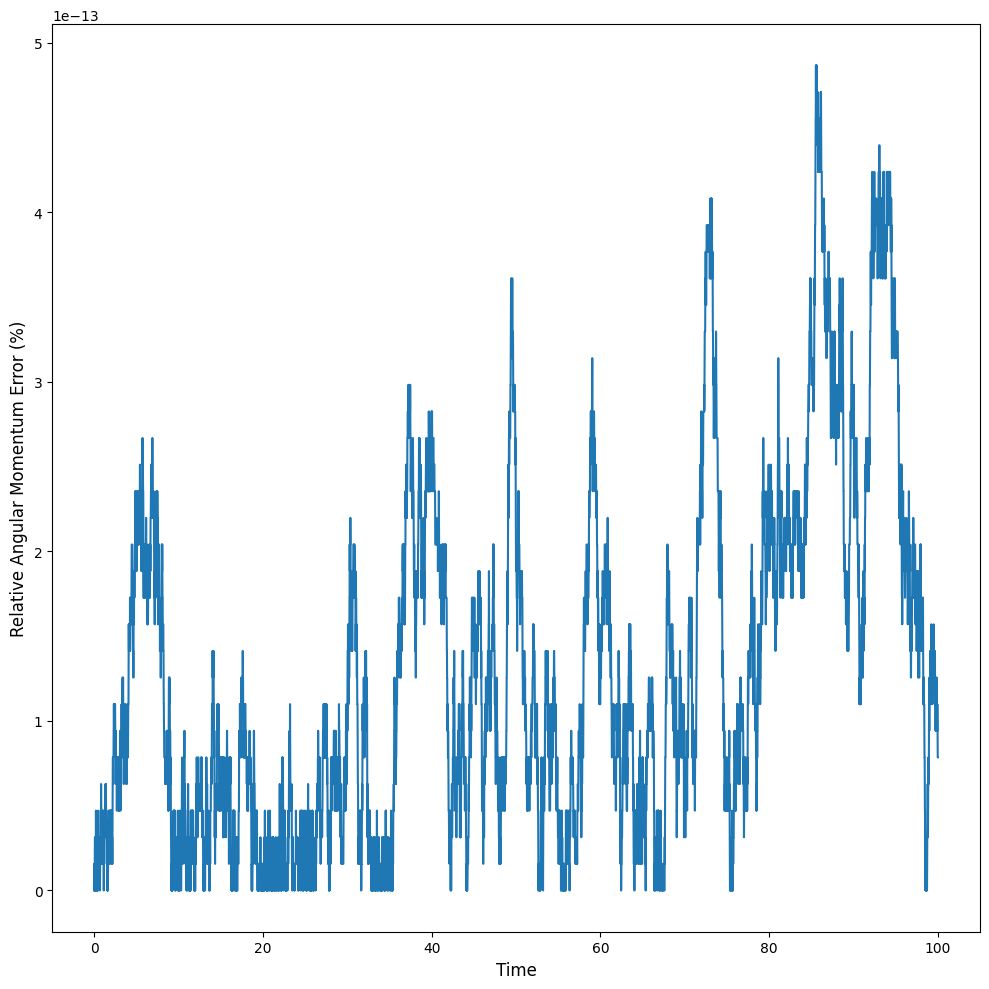

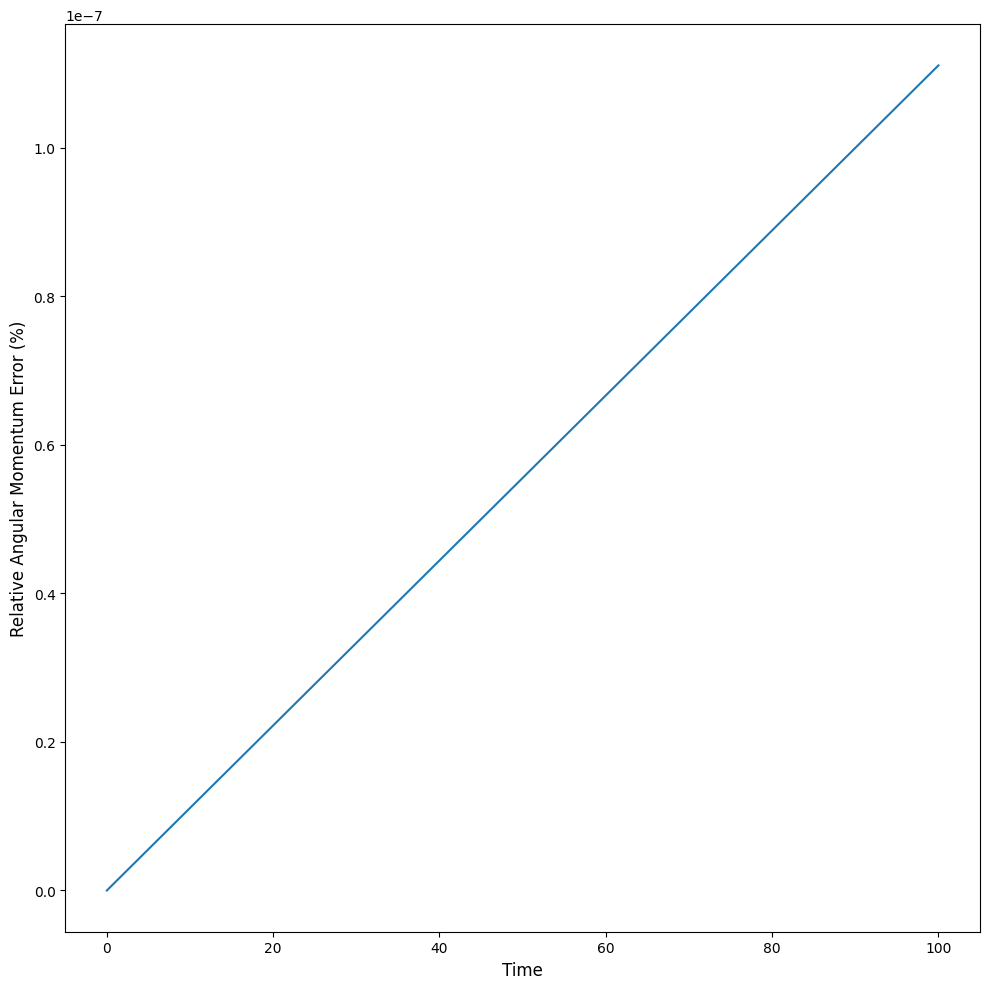

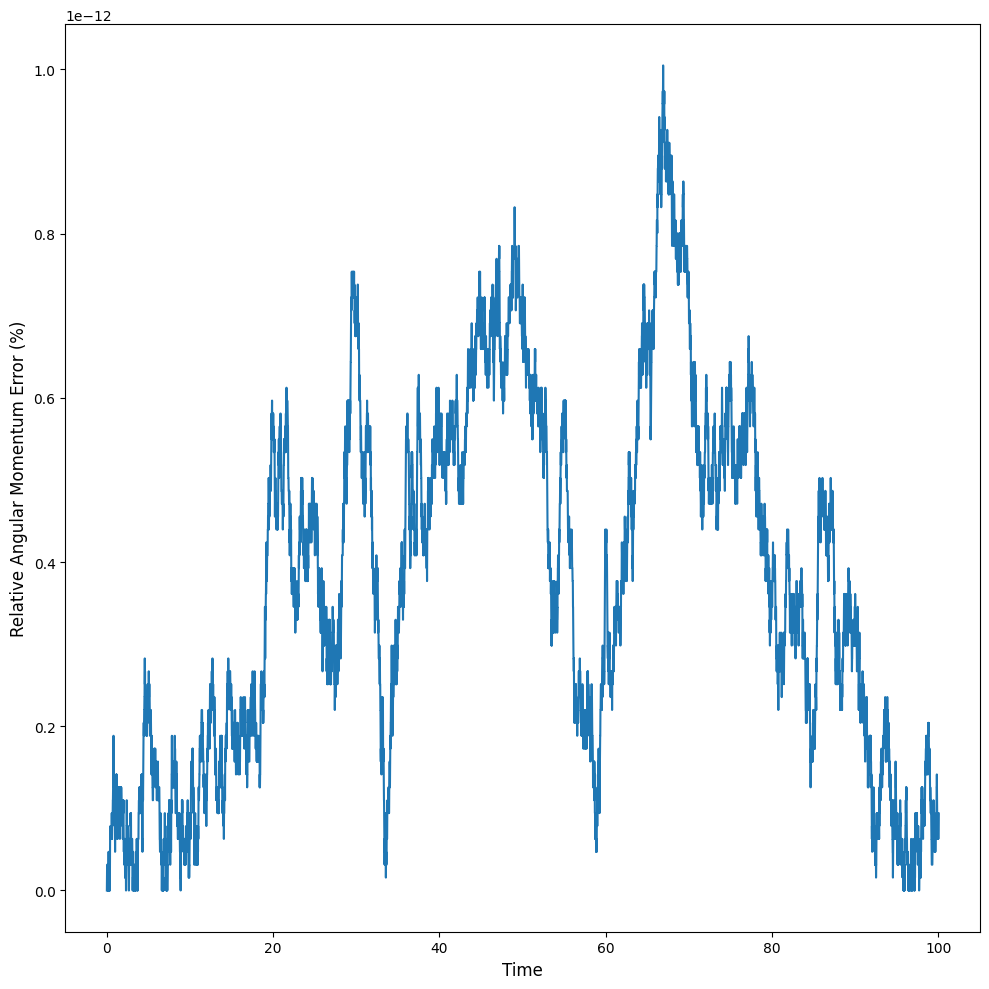

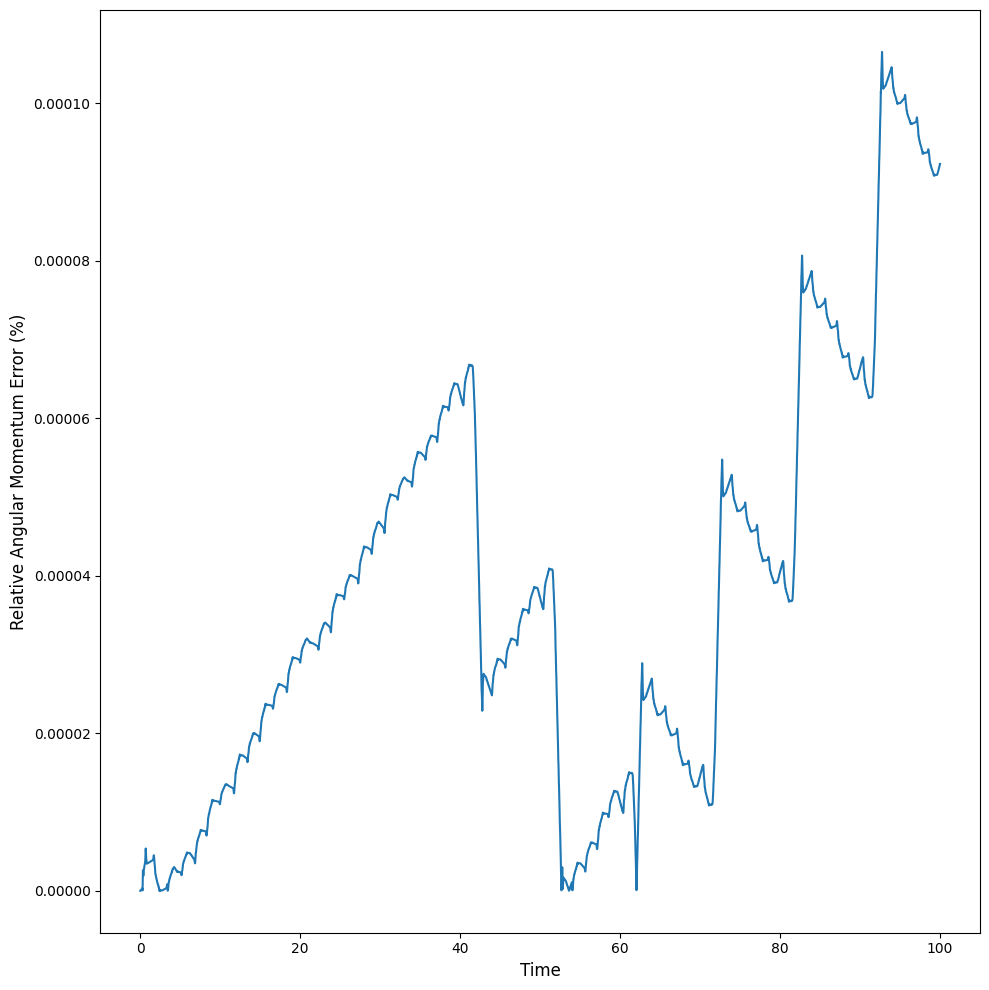

In [13]:
PlotAngularMomentum(Euler_traj, 'Explicit Euler', T, h)
plt.savefig('Plots/AM/Explicit Euler AM.pdf', format = 'pdf')

PlotAngularMomentum(EulerCromer_traj, 'Symplectic Euler', T, h)
plt.savefig('Plots/AM/Symplectic Euler AM.pdf', format = 'pdf')

PlotAngularMomentum(Leapfrog_traj, 'Leapfrog', T, h)
plt.savefig('Plots/AM/Leapfrog Euler AM.pdf', format = 'pdf')

PlotAngularMomentum(RK4_traj, 'RK4', T, h)
plt.savefig('Plots/AM/RK4 Euler AM.pdf', format = 'pdf')

PlotAngularMomentum(ForestRuth_traj, 'Forest-Ruth', T, h)
plt.savefig('Plots/AM/Forest-Ruth AM.pdf', format = 'pdf')

PlotAngularMomentum(Scipy_traj, 'Scipy', T, h)
plt.savefig('Plots/AM/Scipy AM.pdf', format = 'pdf')

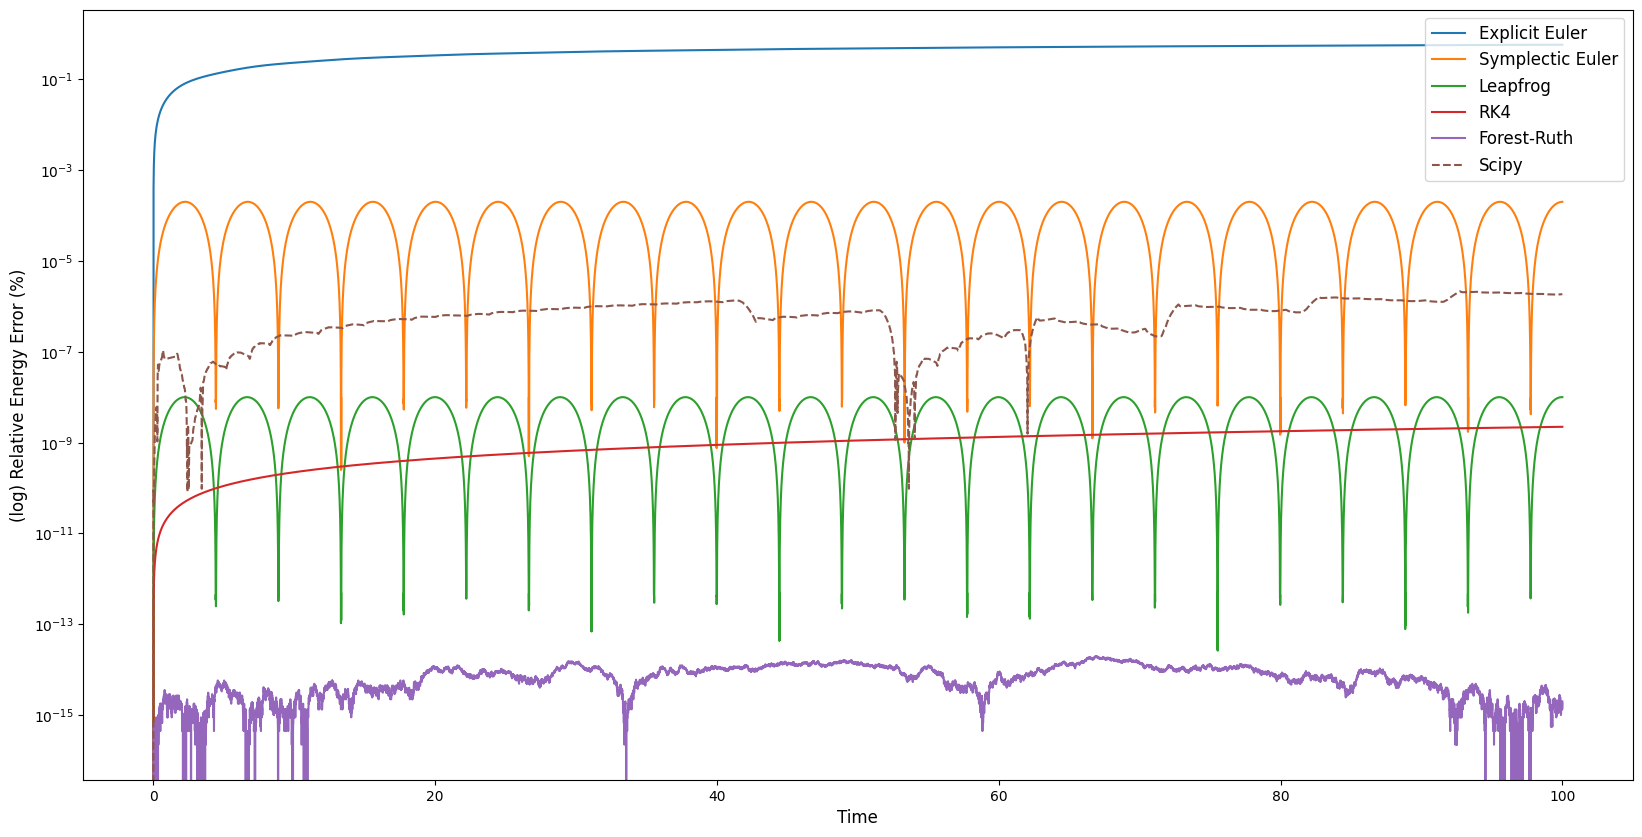

<Figure size 640x480 with 0 Axes>

In [14]:
names = ['Explicit Euler', 'Symplectic Euler', 'Leapfrog', 'RK4', 'Forest-Ruth', 'Scipy']
schemes = ['Explicit Euler', 'Symplectic Euler', 'Leapfrog', 'RK4', 'Forest-Ruth', 'Scipy']
linestyles = ['solid', 'solid', 'solid', 'solid', 'solid', '--']

plt.style.use('default')
fig, ax = plt.subplots(1,1, figsize = (20,10))
for i, scheme in enumerate(schemes):
    traj = trajectories[i]
    t_traj, rs_traj, vs_traj, E_traj, am_traj, time = traj
    E_traj = RelativeEnergy(E_traj)
    ax.plot(t_traj, E_traj, label = names[i], linestyle = linestyles[i])

ax.set_yscale('log')
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('(log) Relative Energy Error (%)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize=12)
plt.show()

plt.savefig('Plots/Energy/Energy Comparison.pdf', format = 'pdf')
    

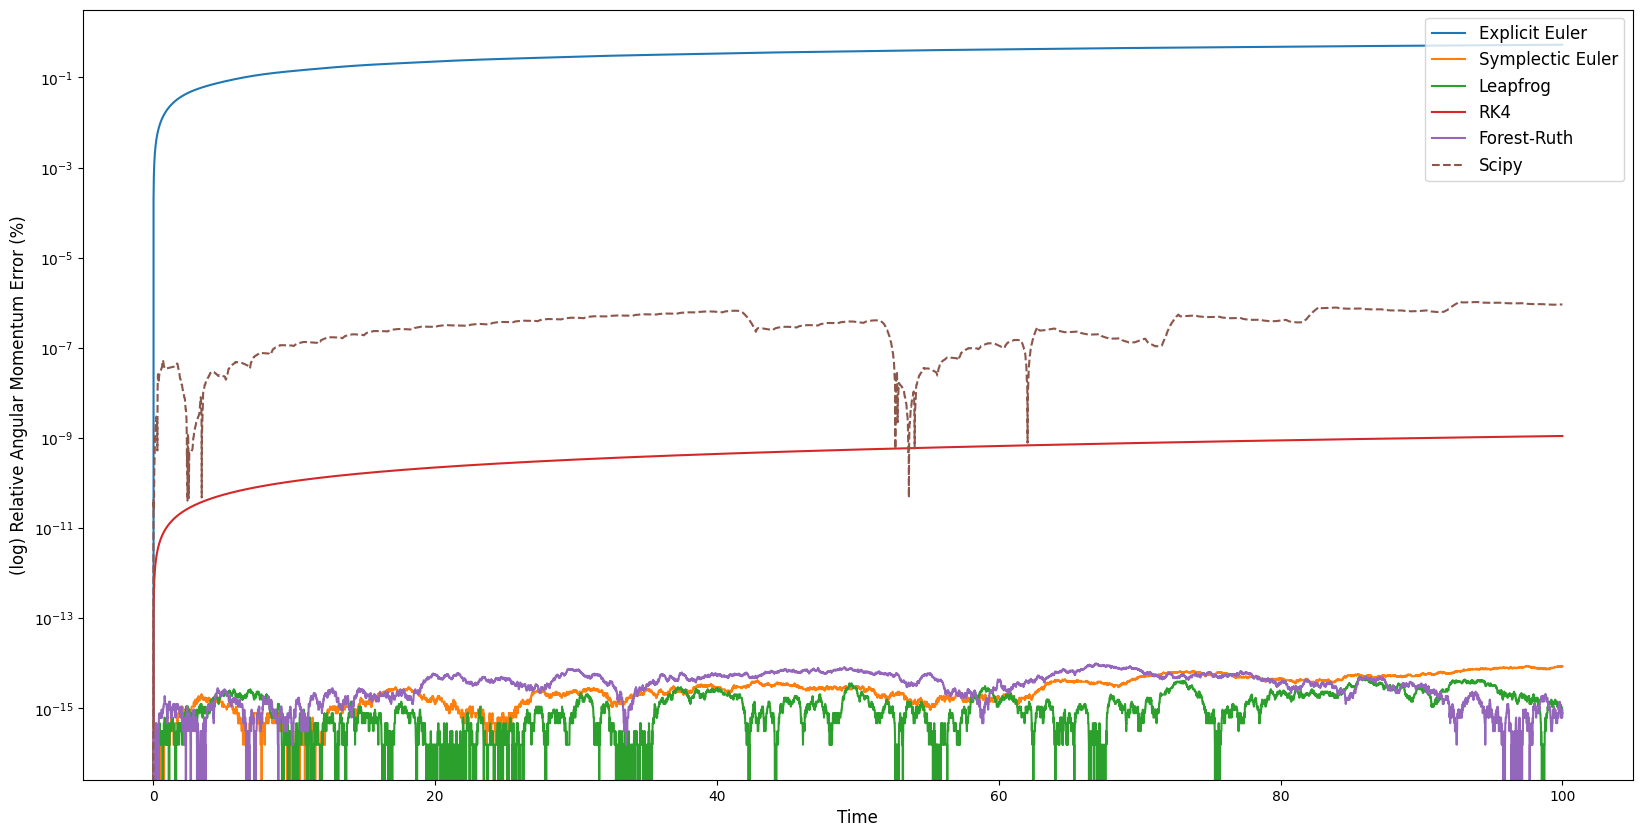

In [17]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for i, scheme in enumerate(schemes):
    traj = trajectories[i]
    t_traj, rs_traj, vs_traj, E_traj, am_traj, time = traj
    am_traj = RelativeAngMomentum(am_traj[:,0])
    ax.plot(t_traj, am_traj, label = names[i], linestyle = linestyles[i])

ax.set_yscale('log')
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('(log) Relative Angular Momentum Error (%)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize=12)

plt.savefig('Plots/AM/AM Comparison.pdf', format = 'pdf')
    

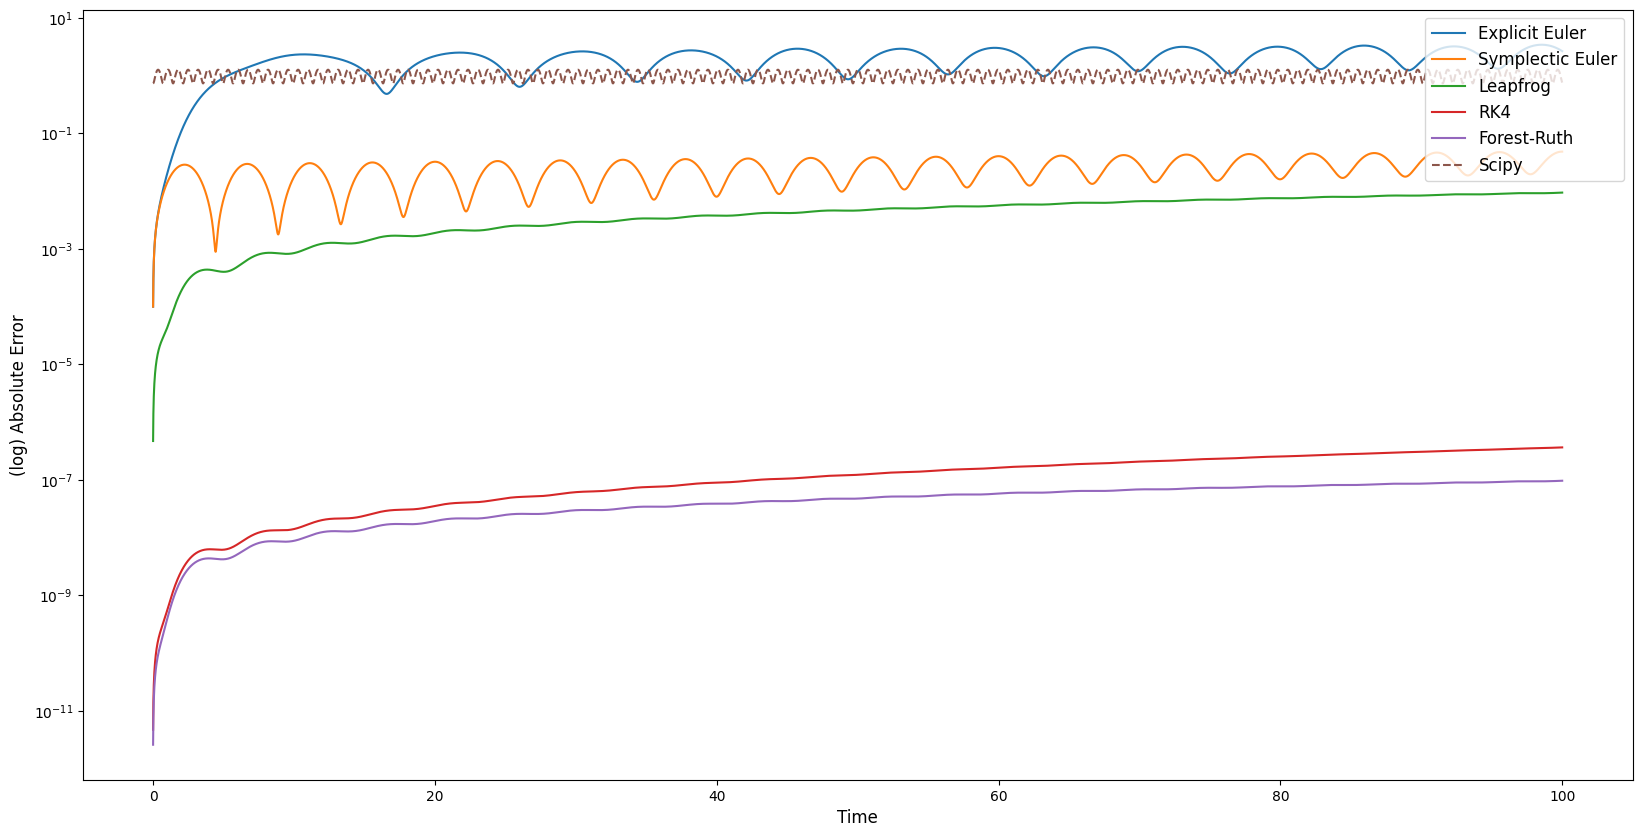

In [18]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for i, scheme in enumerate(schemes):
    err = errs[i]
    ax.plot(t_traj, err, label = names[i], linestyle = linestyles[i])

ax.set_yscale('log')
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('(log) Absolute Error', fontsize = 12)
plt.legend(loc = 'upper right', fontsize=12)

plt.savefig('Plots/Error/Error Comparison.pdf', format = 'pdf')